In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
cg_data = np.load('../../../deterministic/64x64/xi_calculation_visualization/coarse_grained_vel_data/coarse_grained_vel_data_t=50_to_t=100_grid_64_c_1by64.npz')

In [4]:
vel_data_t = cg_data['vel_data_truth'] # coarse-grained vel. data at observation points ('truth')
vel_data_t.shape

(50, 9, 2)

In [5]:
ref_sol = np.load('../../../deterministic/64x64/data_from_deterministic_run/adap_sol_Re_4e4_mesh_64_vel_data_t50_onwards.npz')

In [6]:
vel_data_ref = ref_sol['vel_data_det'] # coarse-grained vel. data at observation points ('truth')
vel_data_ref.shape

(41, 9, 2)

In [7]:
gridpoints = cg_data['gridpoints']
gridpoints.shape

(9, 2)

In [8]:
n_tsteps = 21
n_obs_points = gridpoints.shape[0]
n_stoch_sim_1 = 30
n_stoch_sim_2 = 60

In [9]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_1)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_1))
    for k in range(n_stoch_sim_1):
        data_stoch = np.load('../data_from_stochastic_run/Re_4e4_var_90_mesh_64_vel_data_particle_'+str(k)+'_t50_onwards.npz')
        vel_data_stoch = data_stoch['vel_data_sto']  
        # print(f'particle {k} has shape {vel_data_stoch.shape}')
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [10]:
vel_x_std_plus_sim_1 = vel_x_std_data_plus 
vel_x_std_minus_sim_1 = vel_x_std_data_minus
vel_x_mean_sim_1 = vel_x_mean_mat

vel_y_std_plus_sim_1 = vel_y_std_data_plus 
vel_y_std_minus_sim_1 = vel_y_std_data_minus
vel_y_mean_sim_1 = vel_y_mean_mat

In [11]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_2)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_2))
    for k in range(n_stoch_sim_2):
        data_stoch = np.load('../data_from_stochastic_run/Re_4e4_var_90_mesh_64_vel_data_particle_'+str(k)+'_t50_onwards.npz')
        vel_data_stoch = data_stoch['vel_data_sto']  
        # print(f'particle {k} has shape {vel_data_stoch.shape}')
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [12]:
vel_x_std_plus_sim_2 = vel_x_std_data_plus 
vel_x_std_minus_sim_2 = vel_x_std_data_minus
vel_x_mean_sim_2 = vel_x_mean_mat

vel_y_std_plus_sim_2 = vel_y_std_data_plus 
vel_y_std_minus_sim_2 = vel_y_std_data_minus
vel_y_mean_sim_2 = vel_y_mean_mat

[Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}')]

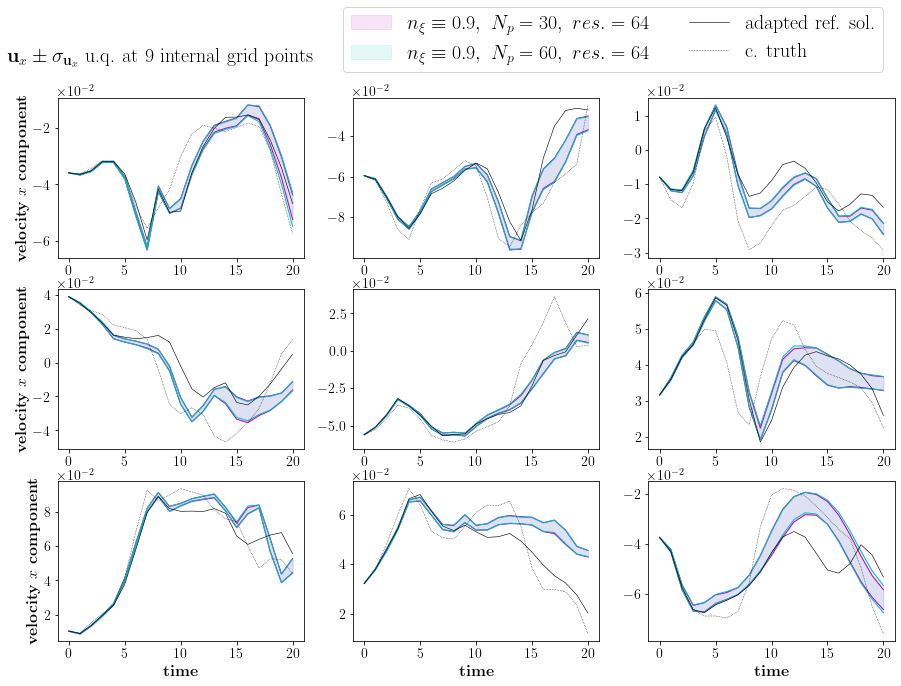

In [13]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
spread_col_sim_1 = "m"
spread_col_sim_2 = "c"
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(vel_x_std_plus_sim_1[sp:,n], color=spread_col_sim_1, linewidth=1)
        ax[i,j].plot(vel_x_std_minus_sim_1[sp:,n], color=spread_col_sim_1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_sim_1[sp:,n],vel_x_std_minus_sim_1[sp:,n], alpha=.1, color=spread_col_sim_1, label=r'$n_{\xi}\equiv 0.9, \ N_p = 30, \ res. = 64$' )
        ax[i,j].plot(vel_x_std_plus_sim_2[sp:,n], color=spread_col_sim_2, linewidth=1)
        ax[i,j].plot(vel_x_std_minus_sim_2[sp:,n], color=spread_col_sim_2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_sim_2[sp:,n],vel_x_std_minus_sim_2[sp:,n], alpha=.1, color=spread_col_sim_2, label=r'$n_{\xi}\equiv 0.9, \ N_p = 60, \ res. = 64$' )
        ax[i,j].plot(vel_data_ref[sp:n_tsteps,n,0], label = 'adapted ref. sol.', color="black", linewidth=0.6)
        ax[i,j].plot(vel_data_t[sp:n_tsteps,n,0], linestyle='dotted', label = 'c. truth', color="black", linewidth=0.6)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.38, 1.02), ncol=2)
fig.suptitle(r'$\mathbf{u}_x \pm \sigma_{\mathbf{u}_x}$ u.q. at $9$ internal grid points', x = 0.22, y = .95)
# set labels
plt.setp(ax[-1, :], xlabel=r'\bf {time}')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $x$ \bf{component}')
# plt.savefig('../plots/UQ_x_vel_mesh_64_var_90_diff_n_particles.pdf',bbox_inches='tight')

[Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}')]

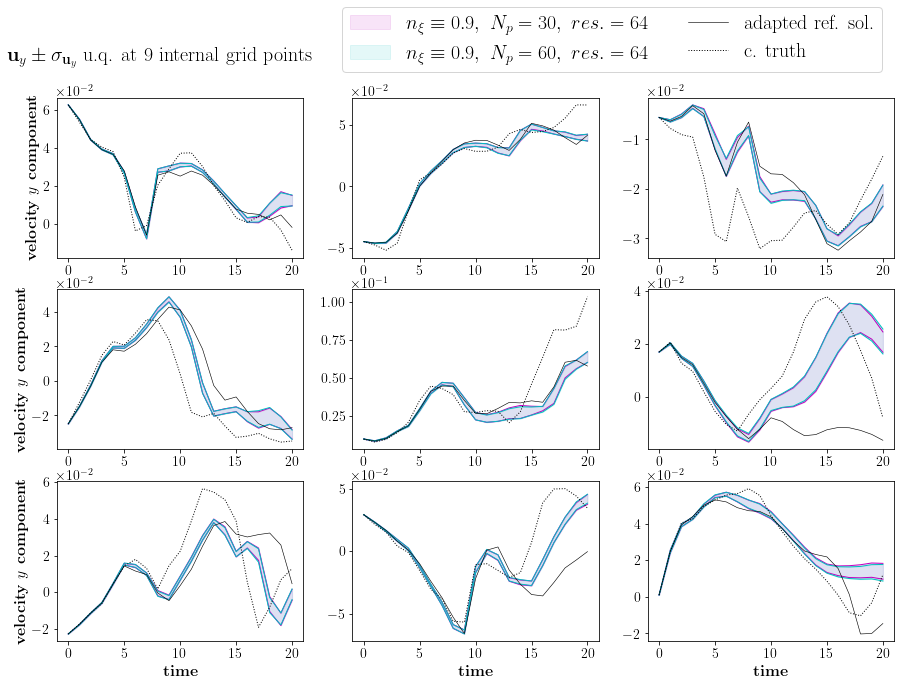

In [14]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
spread_col_sim_1 = "m"
spread_col_sim_2 = "c"
for i in [2,1,0]:
    for j in [0,1,2]:
        
        ax[i,j].plot(vel_y_std_plus_sim_1[sp:,n], color=spread_col_sim_1, linewidth=1)
        ax[i,j].plot(vel_y_std_minus_sim_1[sp:,n], color=spread_col_sim_1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_sim_1[sp:,n],vel_y_std_minus_sim_1[sp:,n], alpha=.1, color=spread_col_sim_1, label=r'$n_{\xi}\equiv 0.9, \ N_p = 30, \ res. = 64$' )
        ax[i,j].plot(vel_y_std_plus_sim_2[sp:,n], color=spread_col_sim_2, linewidth=1)
        ax[i,j].plot(vel_y_std_minus_sim_2[sp:,n], color=spread_col_sim_2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_sim_2[sp:,n],vel_y_std_minus_sim_2[sp:,n], alpha=.1, color=spread_col_sim_2, label=r'$n_{\xi}\equiv 0.9, \ N_p = 60, \ res. = 64$' )
        ax[i,j].plot(vel_data_ref[:n_tsteps,n,1], label = 'adapted ref. sol.', linewidth=0.6, color="black")
        ax[i,j].plot(vel_data_t[sp:n_tsteps,n,1], linestyle='dotted',  label = 'c. truth', color='black', linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.38, 1.02), ncol=2)
fig.suptitle(r'$\mathbf{u}_y \pm \sigma_{\mathbf{u}_y}$ u.q. at $9$ internal grid points', x = 0.22, y = .95)
# set labels
plt.setp(ax[-1, :], xlabel=r'\bf {time}')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $y$ \bf{component}')
# plt.savefig('../plots/UQ_y_vel_mesh_64_var_90_diff_n_particles.pdf',bbox_inches='tight')